# Campañas publicitarias para 2017

## Introducción

El propósito de este proyecto será el de analizar y determinar con base en datos recopilados de las ventas del año 2016, cuáles videojuegos serán los más probables de ser exitos de ventas o que proyecten un crecimiento prometedor para el año 2017, y permitir al equipo de marketing que enfoquen el presupuesto de la publicidad en ellos y logremos generar la mayor cantidad de ventas de la tienda online como sea posible.

Para lograr esto se realizarán distintos pasos a lo largo del proyecto, empezando con la visualización de los datos donde será necesario cargar los archivos mediante la librería de pandas para generar los DataFrame con los que estaremos trabajando, mostrar sus datos resumidos para empezar y reconocer posibles problemas(nombres de las columnas, tipo de datos, duplicados, etc.) o valores ausentes que deban ser modificados; así como el agregar distintos datos que puedan enriquecer los analísis en cada DataFrame para poder proseguir.

Después comenzarán los primeros análisis de los datos, donde vamos a estudiar las variaciones que encontremos en las ventas ya sea por región, plataforma, genero, año, etc.,  calculando las ventas totales de cada juego, posiblemente comparando el comportamiento de algunos juegos de una plataforma a otra, así como la influencia que puedan tener las reseñas en las ventas de un juego o los límites de edad por clasificación tanto en general como en cada región en específico.
año, obteniendo promedios y valores estadísticos como la varianza y desviación estándar, para agrupar estos resultados y crear los primeros gráficos para entender las distribuciones y sacar las primeras conclusiones.

Como último paso partiendo de los datos ya analizados primeramente, seguirán las pruebas de hipótesis para estudiar los promedios de las calificaciones de plataformas como Xbox One y PC y analizar si estas son similares, y también de generos de Acción y de Deportes para estudiar si estos son distintos, obteniendo valores estadísticos como la varianza y desviación estándar para estudiar los promedios y llegar a conclusiones significativas.


## Inicialización

In [1]:
# Cargaremos todas las librerías que puedan ser útiles
import pandas as pd # pandas para crear los DF
from scipy import stats as st # stats para crear las pruebas de estadística
import numpy as np # numpy para las operaciones matemáticas
from matplotlib import pyplot as plt # pyplot para poder crear distintos gráficos si es necesario
import seaborn as sns  # seaborn para crear más gráficos como los de caja y bigotes

In [2]:
# Creamos una función pára aplicar el snake_case a los títulos de las columnas
def snake_case(data):
    col_names_fixed = [] #lista donde se guardarán los nombres en snake_case

    for name in data:
        name_low = name.lower() #convierte cada nombre en minúscula
        new_name = name_low.strip() #elimina cualquier espacio extra
        col_names_fixed.append(new_name)

    return col_names_fixed

## Cargar datos

In [3]:
df_games = pd.read_csv('../games.csv') # creamos el dataframe de las ventas de videojuegos

## Preparar los datos

In [4]:
# Imprimimos la información general del DF
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
# Llamamos una muestra de los datos
print(df_games.sample(5, random_state=123)) 

                           Name Platform  Year_of_Release    Genre  NA_sales  \
7255                     NBA 06      PSP           2005.0   Sports      0.20   
7039           Me & My Katamari      PSP           2005.0   Puzzle      0.13   
3765          Blitz: The League       XB           2004.0   Sports      0.40   
4665  Sega Rally Championship 2       DC           1999.0   Racing      0.00   
6810                  Homefront       PC           2011.0  Shooter      0.11   

      EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
7255      0.00      0.00         0.02          72.0        5.4      E  
7039      0.01      0.08         0.00           NaN        NaN    NaN  
3765      0.11      0.00         0.02          78.0        7.7      M  
4665      0.00      0.41         0.00           NaN        NaN    NaN  
6810      0.10      0.00         0.03          70.0        5.5      M  


Conclusiones iniciales:

Al dar un primer vistazo a los datos podemos observar columnas con las ventas de los videojuegos por cada región particular y además de otras que puedan ser regiones menores o acumulados de otras partes del mundo, cada columna empieza con una mayúscula y no sabemos si alguna tiene espacios extra por lo que sería conveniente aplicar el snake_case en los nombres. Podemos ver el año de lanzamiento, calificaciones de expertos y usuarios, el nombre, genero y su clasificación de edad, hay datos ausentes en la mayoría de las columnas, las plataformas y las ventas de cada región se encuentran sin valores ausentes.

Una buena aproximación para preparar los datos será llenar los valores ausentes con un valor común como 'unknown' para nombres, genero y la clasificación, y un valor númerico como 0 para los valores faltantes en reseñas y el año de lanzamiento faltantes. También se podrá enriquecer el DF cambiando el tipo de dato a ciertas columna, por ejemplo haciendo las plataformas, clasificaciones y si es posible, también el genero en categoría, el año de lanzamiento a numeros enteros y corrigiendo el de la critica de los usuarios a número en vez de un objeto y la de los expertos a entero; además de crear nuevas columnas que aporten informcación útil como una de ventas totales.

### Correción de los datos

In [9]:
df_games.columns = snake_case(df_games.columns) #llamamos la función para hacer snake_case a las columnas

#eliminamos valores ausentes
df_games['name'].fillna('unknown', inplace=True) # cambiamos los valores ausentes de los nombres, clasificación y generos con 'unknown'
df_games['genre'].fillna('unknown', inplace=True)
df_games['rating'].fillna('unknown', inplace=True) 

#eliminamos duplicados explícitos posibles
df_games.drop_duplicates(inplace=True)
print(df_games.duplicated().sum())

0


### Enriquecer los datos

In [10]:
#cambiamos los generos, plataformas y clasificaciones a categorías
df_games['genre'] = df_games['genre'].astype('category')
df_games['rating'] = df_games['rating'].astype('category')

#cambiamos las reseñas de usuarios a numero y verificamos los valores en el año de lanzamiento
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')

In [11]:
#Creamos la columna de total_sales que tendrá las ventas de las 4 columnas con estos datos
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16715 non-null  object  
 1   platform         16715 non-null  object  
 2   year_of_release  16446 non-null  float64 
 3   genre            16715 non-null  category
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       7590 non-null   float64 
 10  rating           16715 non-null  category
 11  total_sales      16715 non-null  float64 
dtypes: category(2), float64(8), object(2)
memory usage: 1.4+ MB


In [12]:
#Obtenemos una muestra de los datos actualizados
print(df_games.sample(5, random_state=222))

                                                 name platform  \
15100  Mesaze!! Tsuri Master: Sekai ni Challenge! Hen      Wii   
10245                      Avatar: The Last Airbender      PSP   
16484                     Juiced 2: Hot Import Nights       PC   
5589          Dragon Ball Heroes: Ultimate Mission 2       3DS   
10558                                        NHL 2004       GC   

       year_of_release      genre  na_sales  eu_sales  jp_sales  other_sales  \
15100           2008.0     Sports      0.00      0.00      0.02         0.00   
10245           2006.0  Adventure      0.10      0.00      0.00         0.01   
16484           2007.0     Racing      0.00      0.01      0.00         0.00   
5589            2014.0   Strategy      0.00      0.00      0.32         0.00   
10558           2003.0     Sports      0.08      0.02      0.00         0.00   

       critic_score  user_score   rating  total_sales  
15100           NaN         NaN  unknown         0.02  
10245     

Los datos ausentes en las columnas de texto('name', 'genre' y 'rating') se decidió llenarlos con la palabra común 'unknown' para reducir el total de valores ausentes en esa columna ya que dicha correción no tendría algún efecto en los posteriores análisis, además de que permitirá encontrar todos los juegos que hayan sido modificados así en una sola busqueda. También dos de estas columnas se cambiaron su tipo de datos a categoría, para reducir el espacio de memoria utilizado por el conjunto de datos y que también facilite el agrupamiento de los juegos ya que estas 3 columnas contenian una pequeña variedad de valores los cuales abarcan todos los juegos en el DF, optando por dejar 'platform' sin modificación para poder realizar comparaciones entre ditintas plataformas.

En cuanto a las columnas con las calificaciones de los juegos, se encontraron la mayor cantidad de valores ausentes en estas los cuales se optó por dejarlos sin modificación, ya que el cambiarlos por un valor común como 0 o el promedio de los valores reales podría alterar la distribución del promedio final o mediana del conjunto de los datos de manera artificial dandonos una interpretación erronea del comportamiento de los mismos; y tampoco eliminarlos, ya que aún contaban con valores de ventas en cada región y suprimirlos podría afectar los calculos futuros de ventas y promedios por regiones o plataformas dando resultados incorrectos. La columna de 'user_score' se decidió convertir en tipo númerica para poder realizar con ella cualquier estudio que requiera agrupar los juegos por rangos de calificación o calcular su promedio ya que sería imposible si se mantienen como objeto o texto; aquí también se encontraron un valor llamado 'tbd' que indicaba que estaba pendiente de evaluarse un juego, este valor se tomó como ausente mediante el argumento 'coerce' al cambiar el tipo de la variable para igualmente no afectar los valores de posición del conjunto de datos. Y los años de lanzamiento de decidió dejar sin modificar, ya que no se sabría con exactitud cuando fueron creados y para no causar que la columna deje de tener datos de tipo numerico.

Es posible que los valores ausentes en las calificaciones y el ESRB se deba a que hayan sido juegos muy poco conocidos o con ventas demasiado bajas(como se puede observar en algunos juegos obtenidos en las muestras del DF), lo que haya causado que tanto usuarios como expertos no vieran como algo importante el calificarlos ya que casi nadie lo vería o hayan tenido una significancia casi nula para la plataforma de juego o su compañia. Y donde los valores de nombre de juego o año de lanzamiento se hayan perdido posiblemente por ser juegos con bastante antiguedad donde su origen es incierto o que esos datos se hayan perdido al recopilar la información de ventas de cada juego.

## Analizar las ventas de los juegos

### Juegos lanzados cada año

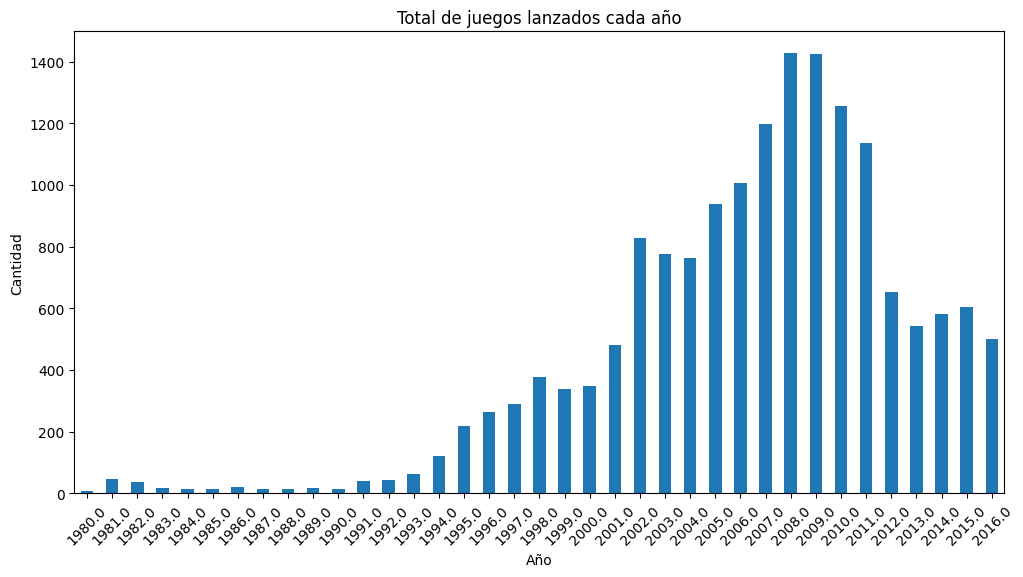

In [13]:
#Contamos cuantos juegos fueron lanzados cada año
games_by_year = df_games.groupby('year_of_release')['name'].count()
games_by_year.plot(kind='bar', 
                   title='Total de juegos lanzados cada año',
                   xlabel='Año',
                   ylabel='Cantidad',
                   figsize=(12, 6))
plt.xticks(rotation=45)
plt.show()

Observaciones: Al mostrar los juegos que fueron lanzados por año podemos notar que en un inicio no se lanzaban juegos en grandes cantidades, siendo hasta mitad de los 90s donde comenzó a crecer el número de juegos y su popularidad seguramente, y llegando sus primeros picos de demanda a principios de los años 2000 donde se superaban los 400 juegos por año y teniendo un salto exponencial en el año 2002 donde casi se duplicó incluso la producción de juegos del año anterior, teniendo su auge de producción y talvez saturación del mercado entre los años 2006 y 2010 donde siempre fueron lanzados arriba de 1000 juegos cada año, y como posible consecuencia teniendo una caida después de eso pero visiblemente estable en los años posteriores con lanzamientos en total de entre 600 y 500 juegos por año, lo que indica que el mercado de los juegos ya se puede encontrar afianzado y que los clientes sean un poco más selectos respecto a qué juegos comprar actualmente.

### Ventas por plataforma

In [14]:
# Agrupamos las ventas por plataforma
platform_sales = df_games.groupby('platform')['total_sales'].sum().reset_index()
platform_sales = platform_sales.sort_values(by='total_sales', ascending=False)
print(platform_sales)

   platform  total_sales
16      PS2      1255.77
28     X360       971.42
17      PS3       939.65
26      Wii       907.51
4        DS       806.12
15       PS       730.86
6       GBA       317.85
18      PS4       314.14
19      PSP       294.05
13       PC       259.52
2       3DS       259.00
29       XB       257.74
5        GB       255.46
11      NES       251.05
10      N64       218.68
23     SNES       200.04
7        GC       198.93
30     XOne       159.32
0      2600        96.98
27     WiiU        82.19
20      PSV        54.07
21      SAT        33.59
8       GEN        30.77
3        DC        15.95
22      SCD         1.86
12       NG         1.44
25       WS         1.42
24     TG16         0.16
1       3DO         0.10
9        GG         0.04
14     PCFX         0.03


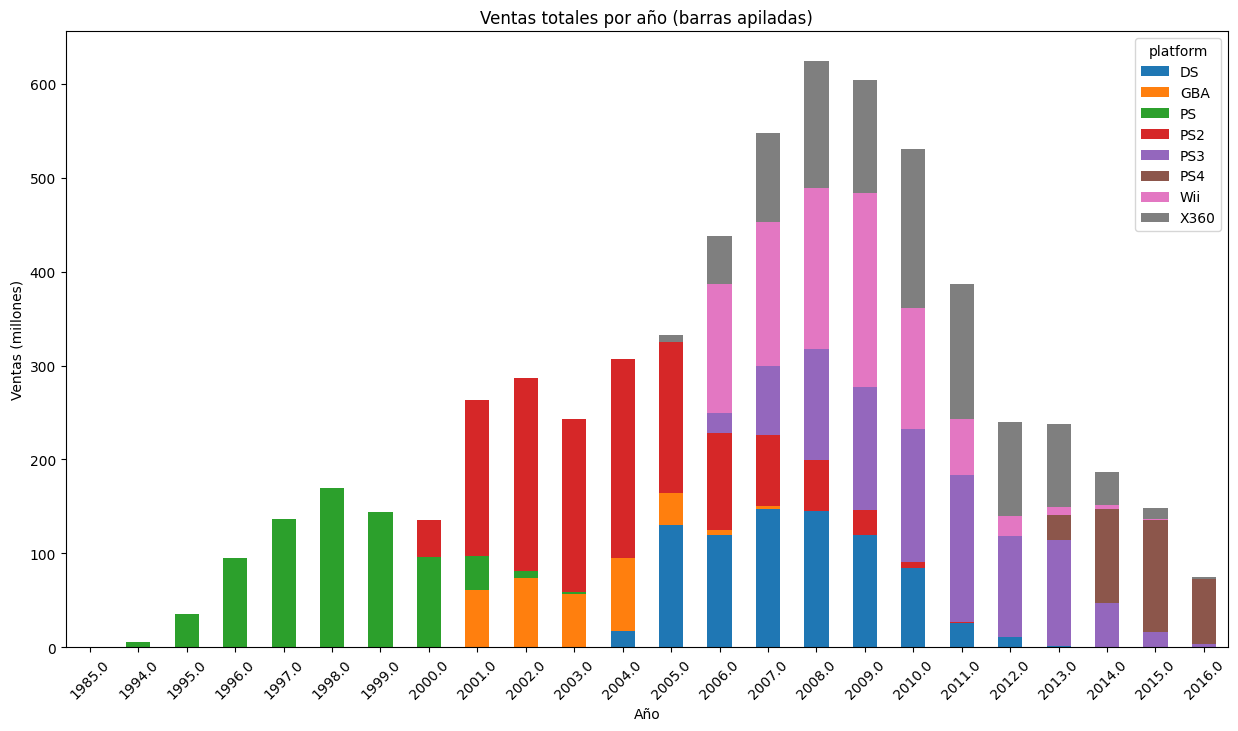

In [15]:
# Agrupamos también las ventas por año y plataforma
platform_sales_by_year = df_games.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

# Filtramos las plataformas más importantes
top_platforms = platform_sales.head(8)['platform'].tolist() #lista con los nombres de las plataformas con mas ventas
top_platform_data = platform_sales_by_year[platform_sales_by_year['platform'].isin(top_platforms)]

# Creamos un pivot para facilitar el gráfico
pivot_data = top_platform_data.pivot(index='year_of_release', columns='platform', values='total_sales')
pivot_data.fillna(0, inplace=True)

# Creamos un gráfico de barras apiladas

pivot_data.plot(kind='bar', stacked=True, figsize=(15, 8), 
                title='Ventas totales por año (barras apiladas)')
plt.xlabel('Año')
plt.ylabel('Ventas (millones)')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Analizamos las plataformas que eran populares pero ya no tienen ventas
recent_years = pivot_data.loc[2014:].sum()  # Ventas en años recientes
early_years = pivot_data.loc[:2011].sum()   # Ventas en años anteriores

print("Plataformas con más ventas en años anteriores:")
print(early_years.sort_values(ascending=False))
print("\nPlataformas con más ventas en años recientes:")
print(recent_years.sort_values(ascending=False))

Plataformas con más ventas en años anteriores:
platform
PS2     1233.56
Wii      855.81
DS       790.23
PS       727.58
X360     724.70
PS3      642.55
GBA      312.88
PS4        0.00
dtype: float64

Plataformas con más ventas en años recientes:
platform
PS4     288.15
PS3      68.18
X360     48.22
Wii       5.07
DS        0.00
GBA       0.00
PS        0.00
PS2       0.00
dtype: float64


Al mostrar las plataformas que han tenido más ventas en cada año pudimos notar que por ejemplo PlayStation(PS, PS2 y PS3), Xbox (X360) y Nintendo (Wii y DS) han sido las compañias con las mayores ventas en total al superar algunas de sus plataformas los 700 millones de dólares. Aqui también encontramos patrones de comportamiento entre cada generación, donde generalmente una nueva plataforma tarda en aparecer entre 5 y 7 años después del lanzamiento de la anterior, y donde la antigua toma entre otros 4 a 6 años en desaparecer, dando como resultado un gráfico de ventas donde los datos de cada plataforma se asemejan basatante a una distribución normal en la mayoría de los casos.

Estos rangos de tiempo también se determinaron al comparar las ventas de las plataformas populares en años recientes contra sus ventas del 2011 para atrás, donde con base a este rango determinado de tiempo el ciclo de vida de algunas plataformas se habría cumplido como es el caso de PS y PS2, GBA y DS, y explicaría que en la actualidad no tienen ventas, otras que se encontrarían en su tramo final como Wii, X360 y PS3; y que tambíen la tabla de ventas reciente muestra la llegada de PS4 como la plataforma más nueva de PlayStation.

### Determinar periodo relevante para los datos

Uniendo los periodos que toman en surgir nuevas plataformas con el que toma a la anterior en desaparecer se determino que el ciclo de vida promedio de una plataforma es de alrededor de 11 años, siendo los años en medio de este rango los de mayores ventas, por lo cual para crear un modelo de ventas para 2017 se decidió establecer el periodo idoneo con los datos de ventas a partir del año 2012, buscando posicionar el año en cuestión como valor central, lo que permitirá analizar las plataformas que aunque vayan a la baja pueden seguir teniendo algo de rentabilidad, así como las emergentes con potencial a corto plazo y aprovechar el exito que puedan tener en este año y los siguientes.

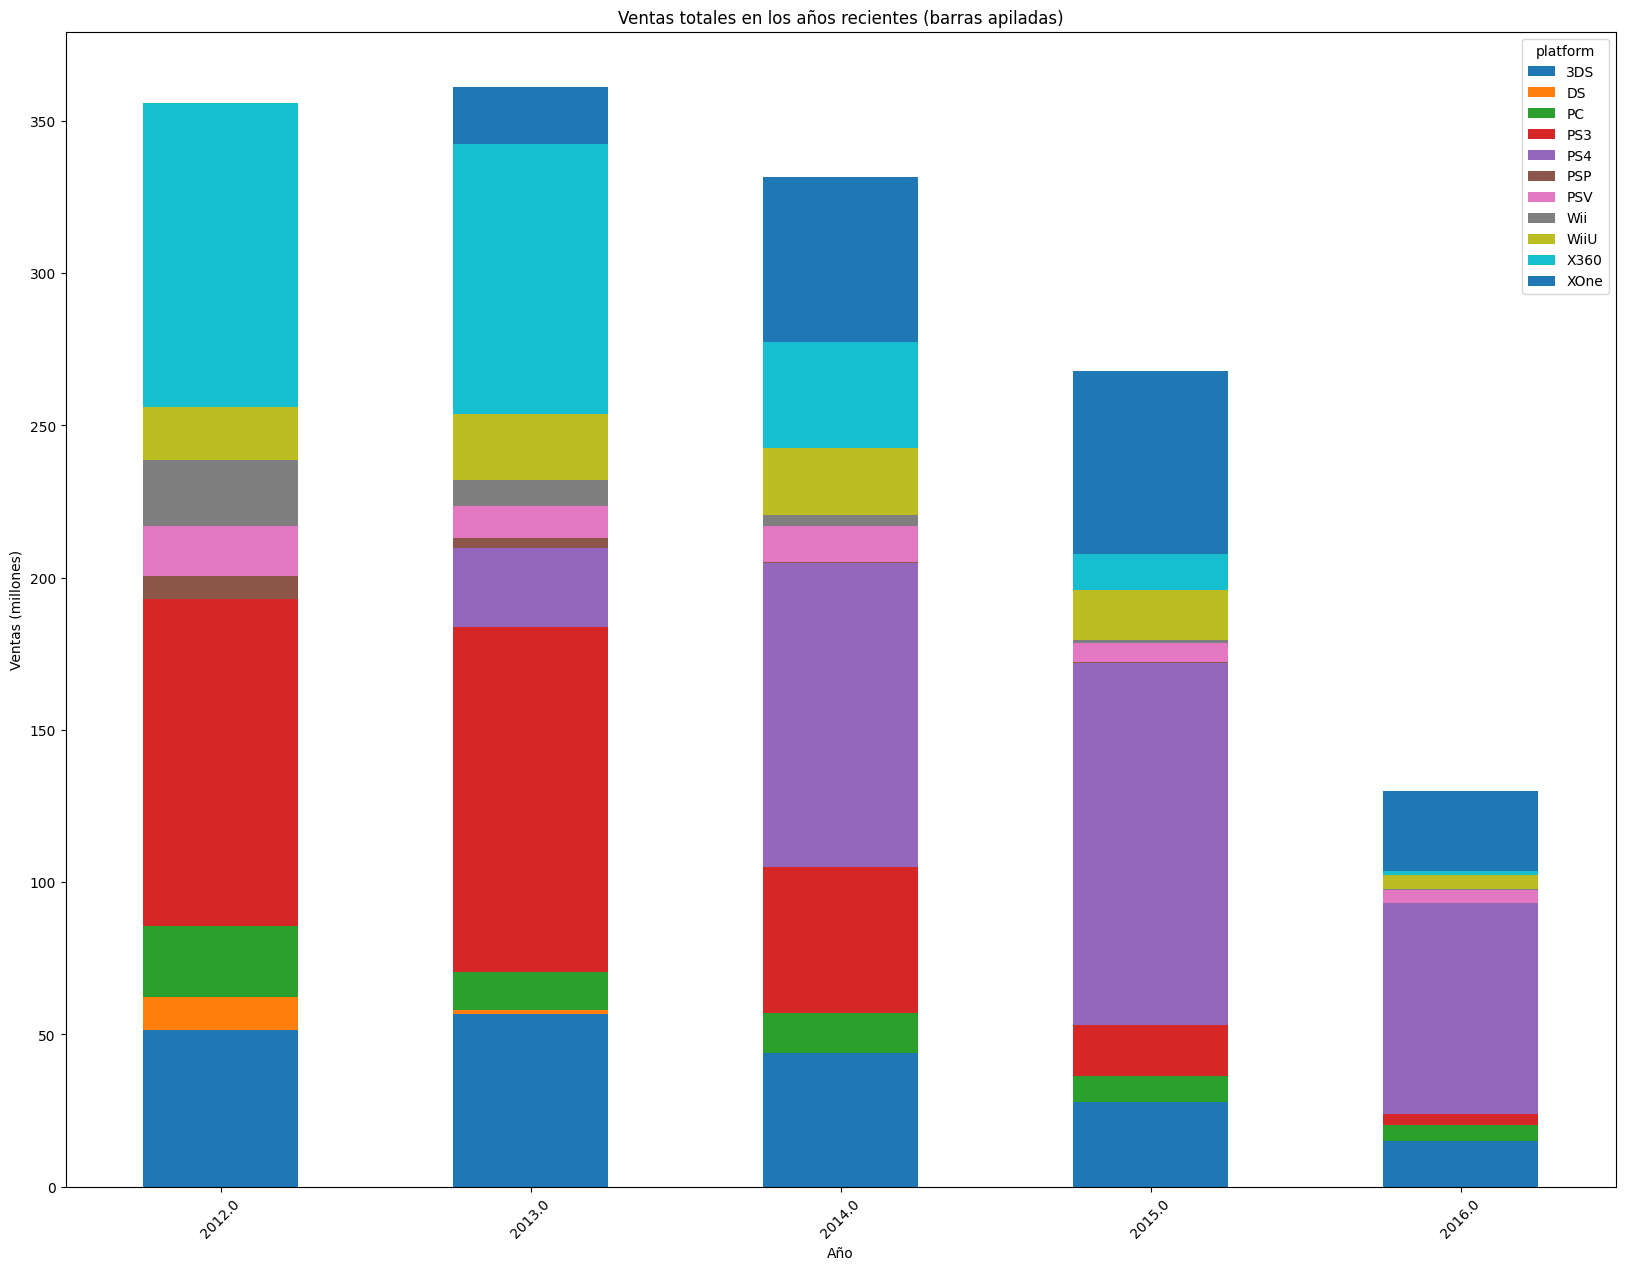

In [17]:
# Creamos el Df con los datos relevantes al filtrar los años desde el 2012 en adelante
recent_years = [2012,2013,2014,2015,2016]
recent_relevant_data = platform_sales_by_year[platform_sales_by_year['year_of_release'].isin(recent_years)]
recent_relevant_data = recent_relevant_data[recent_relevant_data['total_sales'] > 0] #filtramos ventas distintas a 0 para eliminar las plataformas obsoletas

# Creamos un nuevo pivot
recent_pivot_data = recent_relevant_data.pivot(index='year_of_release', columns='platform', values='total_sales')
recent_pivot_data.fillna(0, inplace=True)

# Creamos un gráfico de barras apiladas

recent_pivot_data.plot(kind='bar', stacked=True, figsize=(20, 15), 
                title='Ventas totales en los años recientes (barras apiladas)')
plt.xlabel('Año')
plt.ylabel('Ventas (millones)')
plt.xticks(rotation=45)
plt.show()

### Plataformas potencialmente rentables

Al mostrar las ventas unicamente de los años recientes se pudo observar como plataformas como X360, Wii y PS3 son unas de las líderes ya que han seguido teniendo ventas decentes pero que su ciclo de vida habrá terminado para el año 2017 por lo que muestra el gráfico de barras y sus ventas muy bajas desde el año 2015 y cercanas a 0 en 2016, mostrando otras como la misma PS4 que habíamos comentado, XOne, 3DS y WiiU como las nuevas plataformas que se alzan en el liderato de ventas siendo lanzadas todas entre 2012 y 2013. Se decidió tomar estas plataformas junto con otras como las de mayor potencial para analizar si en verdad pueden ser rentables el enfocar la publicidad para ellas.

In [18]:
#Filtramos las ventas para mostrar las plataformas con posible potencial
top_recent_platforms = recent_pivot_data[['XOne','3DS','WiiU','PS4','PC','PSV']]
print(top_recent_platforms)

platform          XOne    3DS   WiiU     PS4     PC    PSV
year_of_release                                           
2012.0            0.00  51.36  17.56    0.00  23.22  16.19
2013.0           18.96  56.57  21.65   25.99  12.38  10.59
2014.0           54.07  43.76  22.03  100.00  13.28  11.90
2015.0           60.14  27.78  16.35  118.90   8.52   6.25
2016.0           26.15  15.14   4.60   69.25   5.25   4.25


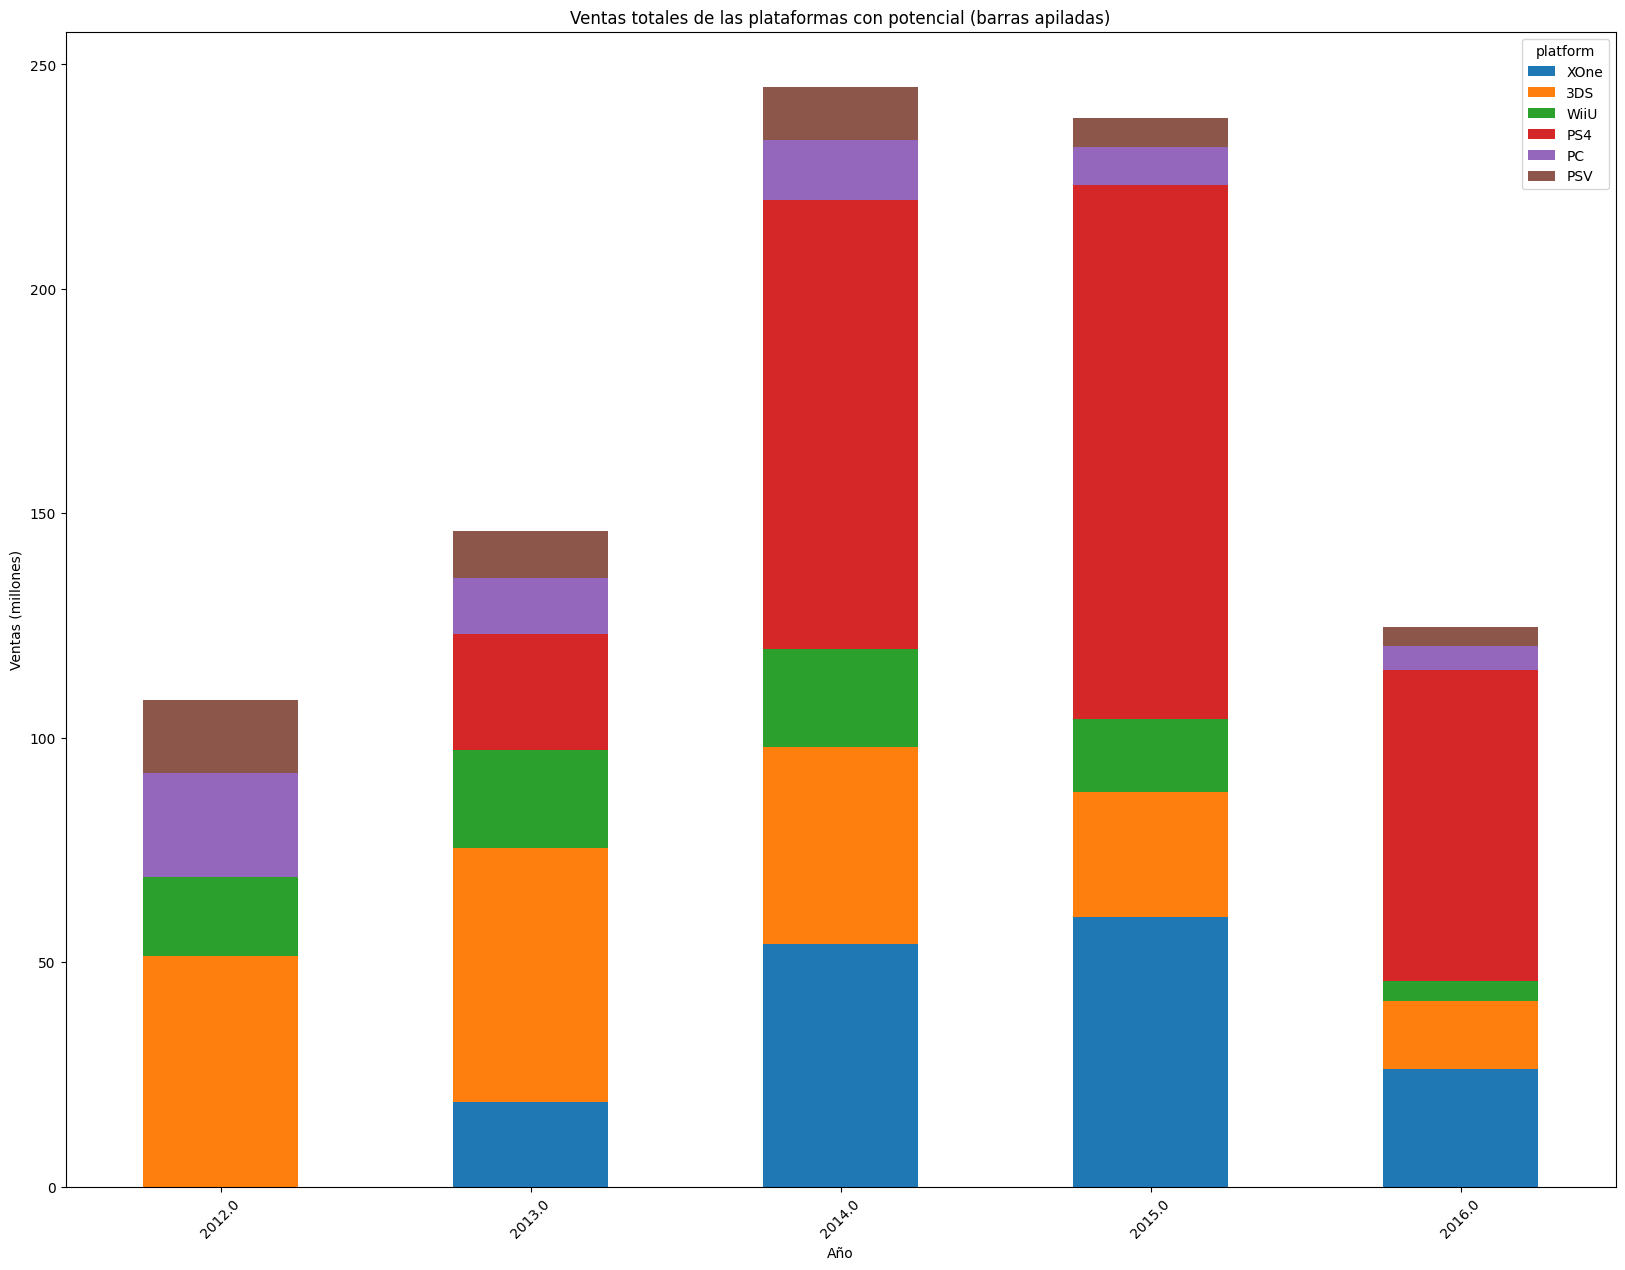

In [19]:
top_recent_platforms.plot(kind='bar', stacked=True, figsize=(20, 15), 
                title='Ventas totales de las plataformas con potencial (barras apiladas)')
plt.xlabel('Año')
plt.ylabel('Ventas (millones)')
plt.xticks(rotation=45)
plt.show()

Viendo las ventas de las plataformas se optó por conservar PS4, XOne, 3DS, WiiU y PC para tener un top 5 de las plataformas con mayor potencial para 2017 al ser las de mayores ventas y que se puede ver su crecimiento en los últimos años.

### Ventas globales

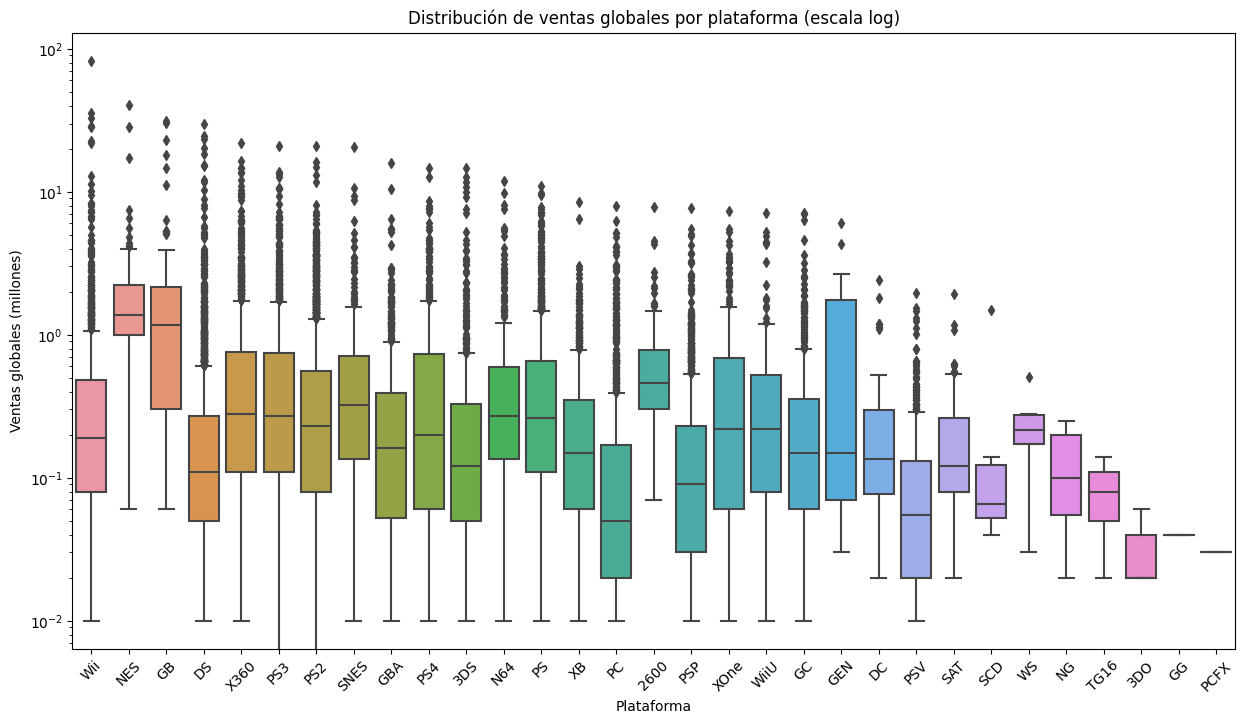

In [20]:
#Creamos los diagramas de caja para los juegos en cada plataforma
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_games, x='platform', y='total_sales')
plt.title('Distribución de ventas globales por plataforma (escala log)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

In [21]:
#Calculamos las ventas promedio por plataforma:
platform_avg_sales = df_games.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
print("Ventas promedio por plataforma:")
print(platform_avg_sales)

Ventas promedio por plataforma:
platform
GB      2.606735
NES     2.561735
GEN     1.061034
SNES    0.836987
PS4     0.801378
X360    0.769746
2600    0.729173
PS3     0.705973
Wii     0.687508
N64     0.685517
XOne    0.645020
PS      0.610576
PS2     0.581106
WiiU    0.559116
3DS     0.498077
GBA     0.386679
DS      0.374765
GC      0.357788
XB      0.312791
SCD     0.310000
DC      0.306731
PC      0.266448
PSP     0.243218
WS      0.236667
SAT     0.194162
PSV     0.125744
NG      0.120000
TG16    0.080000
GG      0.040000
3DO     0.033333
PCFX    0.030000
Name: total_sales, dtype: float64


Después de crear el diagrama de caja de las ventas globales fue posible observar como la mediana de la mayoría de las plataformas es bastante similar a pesar de estar en una escala logarítmica, mostrando también unos rangos intercuartílicos muy parecidos además de ubicarse casi todas las cajas en un mismo rango central del diagrama, lo que explica que muchas plataformas han tenido una variabilidad similar aún siendo de épocas y generaciones diferentes, donde algunas han tenido valores tanto más altos como más bajos. Esta información puede demostrar que las ventas de cada plataforma en general no tuvieron una diferencia muy significativa, siendo factor clave de ver una plataforma en la cima y a otra en el fondo las ventas de sus juegos atípicos o 'super-éxitos' y la cantidad que cada una pudo tener de estos juegos, siendo el mejor ejemplo la Nintendo Wii poseyendo el juego mayor vendido en la historia, y otras como X360, PS3 y PS2 donde sus valores normales están más abajo que la plataforma NES o GB pero la cantidad de juegos con ventas atípicas fue mucho mayor.


Calculando las ventas en promedio de las plataformas se pudo encontrar una variación algo mayor, donde las principales como GB, NES y GEN tuvieron ventas en promedio mayores al millón de dólares, y otras como 3DO, PCFX, GG y TG16 cercanas a 0. Aquí mismo se pudo observar que la diferencia entre las plataformas encontradas más al centro de la tabla es relativamente menor, tomando por ejemplo las elegidas como con mayor potencial para 2017 donde la mayor(PS4) tiene de rango entre las ventas promedio como máximo poco menos de 0.6 hasta la menor(PC).

### Correlación entre reseñas y ventas de un juego

In [22]:
# Filtramos los datos para PS4
ps4_games = df_games[df_games['platform'] == 'PS4'].copy()

# Eliminamos juegos sin reseñas para el análisis
ps4_games_clean = ps4_games.dropna(subset=['critic_score', 'user_score'])

print(f"Juegos de PS4 con reseñas completas: {len(ps4_games_clean)}")

Juegos de PS4 con reseñas completas: 249


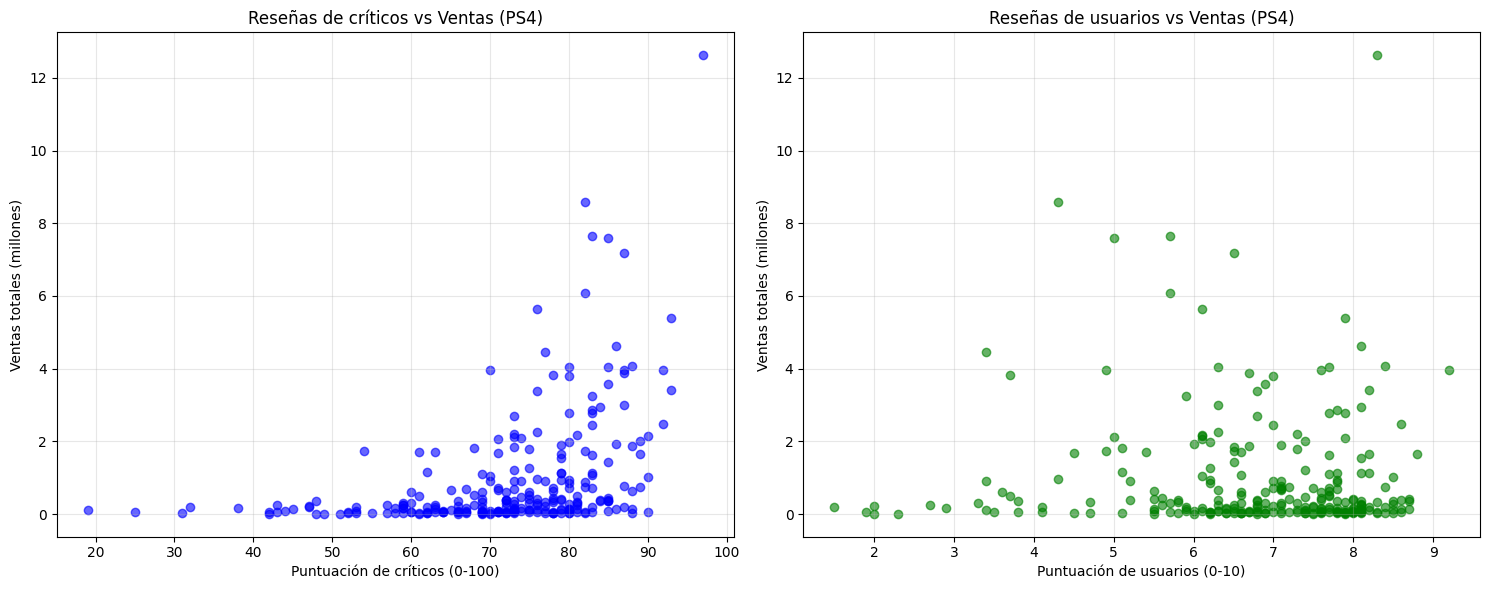

In [23]:
# Configuramos el gráfico con subplots
fig, (critics, users) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Reseñas de críticos vs ventas
critics.scatter(ps4_games_clean['critic_score'], ps4_games_clean['total_sales'], alpha=0.6, color='blue')
critics.set_xlabel('Puntuación de críticos (0-100)')
critics.set_ylabel('Ventas totales (millones)')
critics.set_title('Reseñas de críticos vs Ventas (PS4)')
critics.grid(True, alpha=0.3)

# Gráfico 2: Reseñas de usuarios vs ventas
users.scatter(ps4_games_clean['user_score'], ps4_games_clean['total_sales'], alpha=0.6, color='green')
users.set_xlabel('Puntuación de usuarios (0-10)')
users.set_ylabel('Ventas totales (millones)')
users.set_title('Reseñas de usuarios vs Ventas (PS4)')
users.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [24]:
# Calculamos las correlaciones
critic_correlation = ps4_games_clean['critic_score'].corr(ps4_games_clean['total_sales'])
user_correlation = ps4_games_clean['user_score'].corr(ps4_games_clean['total_sales'])

print("Correlaciones para PS4:")
print(f"Reseñas de críticos vs Ventas: {critic_correlation:.3f}")
print(f"Reseñas de usuarios vs Ventas: {user_correlation:.3f}")

Correlaciones para PS4:
Reseñas de críticos vs Ventas: 0.406
Reseñas de usuarios vs Ventas: -0.034


Analizando el grafico de dispersión de las ventas de los juegos de PS4 comparadas con sus calificaciones otorgadas tanto por usuarios como críticos se pudo observar una tendencia algo positiva entre las reseñas de expertos con el desempeño del juego en cuestión de ventas, mientras que la dispersión en las reseñas de usuarios se mostró con mayor desorden, pudiendo referirse a que los juegos si suelen ser más vendidos dependiendo de una calificación de los críticos más alta a diferencia de la de los usuarios que parece no tener relevancia al momento de comprar un juego. 
Toda esta información se pudo verificar con los cálculos de sus correlaciones, donde la de las reseñas de críticos vs ventas mostraba un valor de 0.406, dando a entender que existe una correlación positiva pero no demasiado fuerte, explicando que si los críticos dan una reseña alta, es algo probable que sus ventas sean buenas. En cambio, la correlación de los usuarios y las ventas dio un valor de -0.034, el cual comprueba que no tendrán nada que ver las reseñas de los usuarios con respecto a las ventas de un juego.

### Ventas de juegos a traves de varias plataformas

In [25]:
#Filtramos el DF original con los juegos de PS4 para ubicar los mismos juegos en las demás plataformas
filtered_platforms_games = df_games[df_games['name'].isin(ps4_games_clean['name'])].copy()

multiple_platforms_names_count = filtered_platforms_games['name'].value_counts() #contamos en cuantas plataformas aparece cada juego

# Filtramos los juegos que aparecen más de una vez para corroborar que son multiplataforma
games_multiple_platforms = multiple_platforms_names_count[multiple_platforms_names_count >= 2]

#Guardamos los juegos filtrados que si sean multiplataforma, luego filtramos los que aparezcan en las plataformas más relevantes
games_multiple_platforms_clean = filtered_platforms_games[filtered_platforms_games['name'].isin(games_multiple_platforms.index)]

relevant_games_multiple_platforms_clean = games_multiple_platforms_clean[games_multiple_platforms_clean['platform'].isin(['XOne','3DS','WiiU','PS4','PC'])]

In [26]:
# Creamos una tabla pivot para comparar las ventas en cada plataforma
multiple_platforms_pivot_data = relevant_games_multiple_platforms_clean.pivot(index='name', columns='platform', values='total_sales')
multiple_platforms_pivot_data.fillna(0, inplace=True)
print(multiple_platforms_pivot_data)

platform                             3DS    PC   PS4  WiiU  XOne
name                                                            
7 Days to Die                       0.00  0.00  0.14   0.0  0.05
Aegis of Earth: Protonovus Assault  0.00  0.00  0.02   0.0  0.00
Agatha Christie's The ABC Murders   0.00  0.00  0.02   0.0  0.01
Alien: Isolation                    0.00  0.15  1.12   0.0  0.50
Angry Birds Star Wars               0.33  0.00  0.22   0.1  0.17
...                                  ...   ...   ...   ...   ...
Wolfenstein: The Old Blood          0.00  0.08  0.43   0.0  0.15
World of Final Fantasy              0.00  0.00  0.34   0.0  0.00
Worms: WMD                          0.00  0.00  0.03   0.0  0.01
XCOM 2                              0.00  0.23  0.14   0.0  0.04
Zombie Army Trilogy                 0.00  0.00  0.20   0.0  0.11

[206 rows x 5 columns]


In [27]:
# Estadísticas más completas por plataforma
platform_stats = relevant_games_multiple_platforms_clean.groupby('platform')['total_sales'].agg(['mean', 'median', 'std', 'count']).sort_values(by='mean',ascending=False)
print("\nEstadísticas completas por plataforma:")
print(platform_stats)


Estadísticas completas por plataforma:
              mean  median       std  count
platform                                   
PS4       1.038592    0.36  1.712768    206
XOne      0.655605    0.27  0.965757    157
WiiU      0.355385    0.32  0.251463     26
3DS       0.314118    0.24  0.235055     17
PC        0.208941    0.10  0.279536     85


Comparando las estadísticas generales de las ventas de los mismos juegos en cada plataforma relevante fue posible observar que PS4 es la de mayores ventas en promedio seguida de XOne, pero donde sus medias varían mucho de las medianas, seguramente por sus juegos que fueron 'super éxitos', a diferencia de las otras 3 donde sus medias y medianas fueron más similares por lo que sus ventas fueron más consistentes y lo demuestran las desviaciones estándar(std) de cada plataforma contra las de las primeras 2 que muestran una gran variabilidad en las ventas.

In [28]:
# Veamos algunos ejemplos de juegos con ventas en al menos 2 plataformas relevantes
games_with_multiple_sales = multiple_platforms_pivot_data[(multiple_platforms_pivot_data > 0).sum(axis=1) >= 2]
print("Juegos con ventas en al menos 2 plataformas:")
print(games_with_multiple_sales.head(10))

Juegos con ventas en al menos 2 plataformas:
platform                               3DS    PC   PS4  WiiU  XOne
name                                                              
7 Days to Die                         0.00  0.00  0.14  0.00  0.05
Agatha Christie's The ABC Murders     0.00  0.00  0.02  0.00  0.01
Alien: Isolation                      0.00  0.15  1.12  0.00  0.50
Angry Birds Star Wars                 0.33  0.00  0.22  0.10  0.17
Arslan: The Warriors of Legend        0.00  0.00  0.09  0.00  0.01
Assassin's Creed IV: Black Flag       0.00  0.65  2.86  0.29  2.24
Assassin's Creed Syndicate            0.00  0.22  3.39  0.00  1.29
Assassin's Creed The Ezio Collection  0.00  0.00  0.20  0.00  0.08
Assassin's Creed: Unity               0.00  0.55  3.96  0.00  3.50
Assetto Corsa                         0.00  0.00  0.06  0.00  0.01


In [29]:
# Encontramos juegos que tengan diferencias significativas en ventas entre distintas plataformas
def platform_sales_diff(platform_wanted,platform_to_compare): #creamos una función para comparar una plataforma contra otra
    games_to_compare = games_with_multiple_sales[(games_with_multiple_sales[platform_wanted] > 0) & 
                                        (games_with_multiple_sales[platform_to_compare] > 0)].copy()
    difference = platform_wanted+'_advantage'
    games_to_compare[difference]= games_to_compare[platform_wanted] / games_to_compare[platform_to_compare]
    print('')
    print(f"Juegos donde {platform_wanted} supera significativamente a {platform_to_compare}:")
    return games_to_compare
    
#Ventas ps4 contra xone
ps4_vs_xone = platform_sales_diff('PS4','XOne')
print(ps4_vs_xone[ps4_vs_xone['PS4_advantage'] > 2].head())

#Ventas XOne contra ps4
xone_vs_ps4 = platform_sales_diff('XOne','PS4')
print(xone_vs_ps4[xone_vs_ps4['XOne_advantage'] > 2].head())

#Ventas ps4 contra pc
ps4_vs_pc = platform_sales_diff('PS4','PC')
print(ps4_vs_pc[ps4_vs_pc['PS4_advantage'] > 2].head())

#Ventas pc contra ps4
pc_vs_ps4 = platform_sales_diff('PC','PS4')
print(pc_vs_ps4[pc_vs_ps4['PC'] > 2].head())

#Ventas 3ds contra ps4
n3ds_vs_ps4 = platform_sales_diff('3DS','PS4')
print(n3ds_vs_ps4[n3ds_vs_ps4['3DS_advantage'] > 2].head())

#Ventas WiiU contra ps4
wiuu_vs_ps4 = platform_sales_diff('WiiU','PS4')
print(wiuu_vs_ps4[wiuu_vs_ps4['WiiU_advantage'] > 2].head())


Juegos donde PS4 supera significativamente a XOne:
platform                              3DS    PC   PS4  WiiU  XOne  \
name                                                                
7 Days to Die                         0.0  0.00  0.14   0.0  0.05   
Alien: Isolation                      0.0  0.15  1.12   0.0  0.50   
Arslan: The Warriors of Legend        0.0  0.00  0.09   0.0  0.01   
Assassin's Creed Syndicate            0.0  0.22  3.39   0.0  1.29   
Assassin's Creed The Ezio Collection  0.0  0.00  0.20   0.0  0.08   

platform                              PS4_advantage  
name                                                 
7 Days to Die                              2.800000  
Alien: Isolation                           2.240000  
Arslan: The Warriors of Legend             9.000000  
Assassin's Creed Syndicate                 2.627907  
Assassin's Creed The Ezio Collection       2.500000  

Juegos donde XOne supera significativamente a PS4:
Empty DataFrame
Columns: [3DS, PC,

Al estudiar el comportamiento de los mismos juegos en las otras plataformas principales se pudo notar como en general los juegos son más consumidos en PS4 mostrando en los ejemplos principalmente los juegos de acción, que aunque por ejemplo tienen también ventas considebales en Xbox one, esta plataforma no tiene ningún juego que supere significativamente las ventas con PS4, y lo mismo ocurre con las demás plataformas del mismo estilo, mostrando como la Nintendo 3DS tiene mejores ventas en 2 juegos las cuales pueden deberse al género de juegos al que pertenecen y que las plataformas portatiles pueden tener un mayor enfoque en estos.

### Generos de juegos más rentables

In [30]:
genre_analysis = df_games.groupby('genre')['total_sales'].agg(['sum', 'mean', 'median', 'count', 'std']).round(3)
genre_analysis = genre_analysis.sort_values('sum', ascending=False)
print("Análisis de estadísticas por género:")
print(genre_analysis)

Análisis de estadísticas por género:
                  sum   mean  median  count    std
genre                                             
Action        1744.17  0.518    0.19   3369  1.146
Sports        1331.27  0.567    0.22   2348  2.085
Shooter       1052.45  0.796    0.24   1323  1.816
Role-Playing   934.56  0.624    0.18   1498  1.710
Platform       827.77  0.932    0.27    888  2.575
Misc           802.51  0.459    0.16   1750  1.305
Racing         728.67  0.583    0.19   1249  1.657
Fighting       447.53  0.527    0.21    849  0.952
Simulation     389.97  0.447    0.15    873  1.187
Puzzle         242.57  0.418    0.11    580  1.562
Adventure      237.59  0.182    0.05   1303  0.509
Strategy       174.23  0.255    0.10    683  0.519
unknown          2.42  1.210    1.21      2  1.669


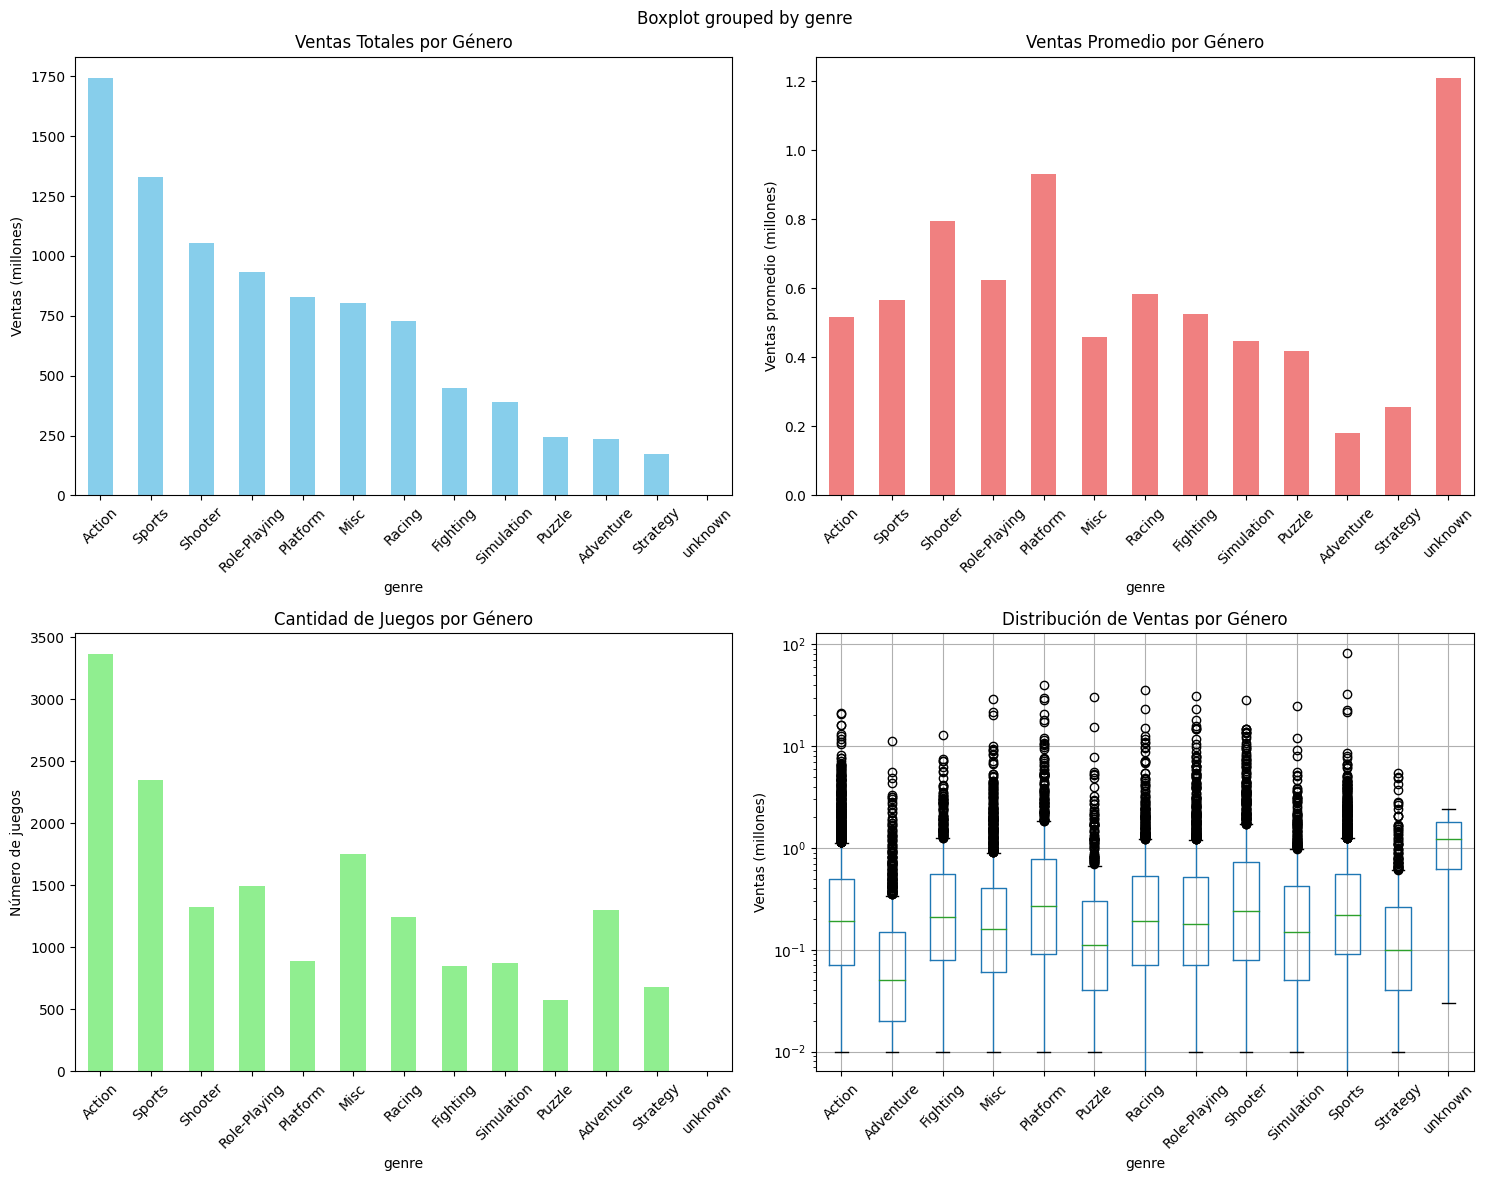

In [31]:
# Graficamos algunos resultados para entender mejor
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Gráfico 1: Ventas totales por género
genre_analysis['sum'].plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Ventas Totales por Género')
ax1.set_ylabel('Ventas (millones)')
ax1.tick_params(axis='x', rotation=45)

# Gráfico 2: Ventas promedio por género
genre_analysis['mean'].plot(kind='bar', ax=ax2, color='lightcoral')
ax2.set_title('Ventas Promedio por Género')
ax2.set_ylabel('Ventas promedio (millones)')
ax2.tick_params(axis='x', rotation=45)

# Gráfico 3: Cantidad de juegos por género
genre_analysis['count'].plot(kind='bar', ax=ax3, color='lightgreen')
ax3.set_title('Cantidad de Juegos por Género')
ax3.set_ylabel('Número de juegos')
ax3.tick_params(axis='x', rotation=45)

# Gráfico 4: Boxplot de distribución de ventas
df_games.boxplot(column='total_sales', by='genre', ax=ax4)
ax4.set_title('Distribución de Ventas por Género')
ax4.set_ylabel('Ventas (millones)')
ax4.set_yscale('log')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Analizando las ventas de los juegos por sus géneros fue posible observar que los de mayores ventas son los géneros de acción(1744.17), deportes(1331.27), disparos(1052.45), de rol(934.56) y los de plataformas(827.77); no obstante, sus ventas en promedio son muy distintas siendo las de plataformas y disparos mucho mayores que las de acción o deportes, esto junto a la cantidad de juegos de cada una indica que por ejemplo la plataforma de acción que es la que vende más, puede tener muchos juegos donde habrá algunos que sean muy vendidos y también otros con ventas casi nulas, a comparación de las primeras 2 donde su cantidad de juegos en total es bastante menor lo que puede significar que los juegos en estos géneros tienden a ser más rentables haciendo un mayor énfasis en el genero de disparos al mostrar una desviación estándar algo menor a la de plataforma significando que sus juegos tendrán unas ventas más consistentes.

Además se podría ver que los géneros de pelea, simulación y 'puzzle' tendrían la posibilidad de ser relativamente rentables, con ventas muy consistentes gracias a sus desviaciones algo bajas y un promedio de ventas considerable a pesar de contar con una baja cantidad de juegos, con lo cual sería posible llamarlos géneros 'nicho' o 'de culto' los cuales podría valer la pena tomar en cuenta para las decisiones de marketing. Además viendo los datos no se podría generalizar acerca de los géneros con ventas altas y bajas ya que hay algunos como acción que tiene muchas ventas y muchos juegos, otros como aventura con bastantes juegos también pero un desempeño pauperrimo en general, y otros como los de plataforma con pocos juegos en total pero con números bastante sobresalientes.

## Comportamientos por región

### Plataformas principales

In [32]:
#Creamos una función que agrupe los juegos por plataforma para cada región y calcula la cuota del mercado

def analyze_market_share_by_region(region):
    if region == 'eu':
        sales_col = 'eu_sales'
        region_name = 'Europa'
    elif region == 'na':
        sales_col = 'na_sales'
        region_name = 'Norteamérica'
    else:
        sales_col = 'jp_sales'
        region_name = 'Japón'
    
    # Calcular ventas totales por plataforma
    platform_sales = df_games.groupby('platform')[sales_col].sum().sort_values(ascending=False)
    
    # Calcular cuota de mercado (porcentaje)
    total_market = platform_sales.sum()
    market_share = (platform_sales / total_market * 100).round(2)
    
    print(f"\n== TOP 5 PLATAFORMAS EN {region_name.upper()} ==")
    print("Plataforma | Ventas (M) | Cuota (%)")
    print("-" * 35)

    #Mostramos cada plataforma y sus datos con enumerate y acomodamos la tabla para mostrar plataforma - ventas - % de la cuota
    for i, (platform, sales) in enumerate(platform_sales.head().items()):
        share = market_share[platform]
        print(f"{platform:10} | {sales:8.2f} | {share:6.2f}%")
    
    return platform_sales.head(), market_share.head()

# Analizar cada región
na_sales, na_share = analyze_market_share_by_region('na')
eu_sales, eu_share = analyze_market_share_by_region('eu')
jp_sales, jp_share = analyze_market_share_by_region('jp')


== TOP 5 PLATAFORMAS EN NORTEAMÉRICA ==
Plataforma | Ventas (M) | Cuota (%)
-----------------------------------
X360       |   602.47 |  13.69%
PS2        |   583.84 |  13.26%
Wii        |   496.90 |  11.29%
PS3        |   393.49 |   8.94%
DS         |   382.40 |   8.69%

== TOP 5 PLATAFORMAS EN EUROPA ==
Plataforma | Ventas (M) | Cuota (%)
-----------------------------------
PS2        |   339.29 |  13.99%
PS3        |   330.29 |  13.62%
X360       |   270.76 |  11.17%
Wii        |   262.21 |  10.81%
PS         |   213.61 |   8.81%

== TOP 5 PLATAFORMAS EN JAPÓN ==
Plataforma | Ventas (M) | Cuota (%)
-----------------------------------
DS         |   175.57 |  13.53%
PS         |   139.82 |  10.78%
PS2        |   139.20 |  10.73%
SNES       |   116.55 |   8.98%
3DS        |   100.67 |   7.76%


Mostrando las principales plataformas en cada región se pudo observar que PS2 por ejemplo aparece en los top 5 de las 3 regiones teniendo sus mejores números en cuota de mercado en Europa y Norteamérica, además de que en estas 2 regiones las 4 principales plataformas son las mismas con ligeros cambios en las posiciones, donde las cuotas de mercado también son muy similares a excepción de PS3. En Norteamérica la plataforma con mas ventas(602.47) y mayor cuota(16.69%) es la Xbox 360, que podría ser gracias a ser una plataforma hecha en ese continente, y también se puede observar que las plataformas principales superan el 50% de la cuota de mercado; mientras que en Europa la corona pertenece a PS2 muy pegada con PS3 con cuotas de 13.99% y 13.62% respectivamente, apareciendo hasta el tercer lugar X360 con 11.17%, lo que podría reflejar como en ambas regiones se consumen las tecnología de todo el mundo, y donde es posible que los usuarios se enfoquen en pocas plataformas a la hora de comprar juegos ya que aquí su top 5 abarca casi el 60% de la cuota de mercado total de dicha región. 

Analizando los datos de Japón se notó que sus principales plataformas son todas de su mismo país, donde incluso la Nintendo DS superó las ventas y la cuota de PS2 que es más consumida en las demás regiones, y esta junto con la 3DS pertenecen al tipo de plataformas portátiles, lo que refleja que este tipo de plataformas de videojuegos juega un papel importante en su cuota de mercado juntando alrededor del 21% entre estas 2, dándole a Nintendo una mayor ocupación de la cuota de mercado sobre PlayStation que suele ser la de mayores cantidades en las demás regiones. Otro punto a destacar es como aquí no se encuentra la platamorma Wii en las principales, siendo entonces su popularidad principalmente en occidente, y en el caso contrario estarían la 3DS antes mencionada y SNES como plataformas muy populares dentro de Japón exclusivamente.

### Generos principales

In [33]:
#Replicamos el código para una función que ahora agrupe los juegos por género para cada región

def top_genre_by_region(region):
    if region == 'eu':
        sales_col = 'eu_sales'
        region_name = 'Europa'
    elif region == 'na':
        sales_col = 'na_sales'
        region_name = 'Norteamérica'
    else:
        sales_col = 'jp_sales'
        region_name = 'Japón'
    
    # Calcular ventas totales por género
    genre_sales = df_games.groupby('genre')[sales_col].sum().sort_values(ascending=False)
    
    # Calcular cuota de mercado (porcentaje)
    total_market = genre_sales.sum()
    market_share = (genre_sales / total_market * 100).round(2)
    
    print(f"\n== TOP 5 GENEROS EN {region_name.upper()} ==")
    print("    Género   | Ventas (M) | Cuota (%)")
    print("-" * 35)

    #Mostramos de la misma forma los datos de los géneros
    for i, (genre, sales) in enumerate(genre_sales.head().items()):
        share = market_share[genre]
        print(f"{genre:12} | {sales:8.2f} | {share:6.2f}%")
    
    return platform_sales.head(), market_share.head()

# Analizar cada región
na_genres, na_genre_share = top_genre_by_region('na')
eu_genres, eu_genre_share = top_genre_by_region('eu')
jp_genres, jp_genre_share = top_genre_by_region('jp')


== TOP 5 GENEROS EN NORTEAMÉRICA ==
    Género   | Ventas (M) | Cuota (%)
-----------------------------------
Action       |   879.01 |  19.97%
Sports       |   684.43 |  15.55%
Shooter      |   592.24 |  13.45%
Platform     |   445.50 |  10.12%
Misc         |   407.27 |   9.25%

== TOP 5 GENEROS EN EUROPA ==
    Género   | Ventas (M) | Cuota (%)
-----------------------------------
Action       |   519.13 |  21.41%
Sports       |   376.79 |  15.54%
Shooter      |   317.34 |  13.09%
Racing       |   236.51 |   9.75%
Misc         |   212.74 |   8.77%

== TOP 5 GENEROS EN JAPÓN ==
    Género   | Ventas (M) | Cuota (%)
-----------------------------------
Role-Playing |   355.41 |  27.39%
Action       |   161.43 |  12.44%
Sports       |   135.54 |  10.45%
Platform     |   130.83 |  10.08%
Misc         |   108.11 |   8.33%


Mostrando ahora los géneros más populares en cada región fue posible descubrir un comportamiento similar a las plataforma entre los géneros más consumidos en NA y EU, con los juegos de acción(19.97% y 21.41%), deportes(15.55% y 15.54%) y disparos (13.45% y 13.09%) como sus 3 principales y en el mismo orden, a diferencia de Japón que si suelen comprar juegos de acción o deportes en un porcentaje un poco parecido a las otras 2, pero son los juegos de rol los que acaparan más de 1/4 de la cuota de su mercado ellos solos y notando que casi la mitad del las ventas totales de dicho gérero provienen unicamente de este país, siendo la principal diferencia que aquí los disparos no es un genero tan preferido como en Occidente. Además en las regiones de NA y Japón se consumen juegos de plataformas y miscelaneos en cantidades casi indenticas, donde los juegos de carreras son más preferidos por los usuarios en EU que los de plataformas y comparten también una cuota de mercado similar a la de las otras regiones por parte de los miscelaneos.

### ¿Afectan las clasificaciones?

In [34]:
#Creamos una función similar para agrupar por clasificación en cada región

def analyze_ratings_by_region(region):
    if region == 'eu':
        sales_col = 'eu_sales'
        region_name = 'Europa'
    elif region == 'na':
        sales_col = 'na_sales'
        region_name = 'Norteamérica'
    else:
        sales_col = 'jp_sales'
        region_name = 'Japón'

    # Calcular estadísticas por clasificación y ordenar por sus ventas
    rating_sales = df_games.groupby('rating')[sales_col].agg(['sum', 'mean', 'median', 'count'])
    rating_sales = rating_sales.sort_values('sum', ascending=False)
    
    print(f"\n== ANÁLISIS DE VENTAS POR CLASIFICACIÓN ESRB EN {region_name.upper()}==")
    print("Clasificación | Ventas totales | Mediana | Promedio | Cantidad")
    print("-" * 65)

    #Con iterrows obtenemos los valores de cada columna de la fila y los mostramos 
    for rating, stats in rating_sales.iterrows():
        print(f"{rating:13} | {stats['sum']:14.3f} | {stats['median']:7.3f} | {stats['mean']:8.3f} | {stats['count']:7}")
    

# Analizar cada región
analyze_ratings_by_region('na')
analyze_ratings_by_region('eu')
analyze_ratings_by_region('jp')


== ANÁLISIS DE VENTAS POR CLASIFICACIÓN ESRB EN NORTEAMÉRICA==
Clasificación | Ventas totales | Mediana | Promedio | Cantidad
-----------------------------------------------------------------
E             |       1292.990 |   0.120 |    0.324 |  3990.0
unknown       |       1242.460 |   0.000 |    0.184 |  6766.0
T             |        759.750 |   0.110 |    0.257 |  2961.0
M             |        748.480 |   0.140 |    0.479 |  1563.0
E10+          |        353.320 |   0.120 |    0.249 |  1420.0
K-A           |          2.560 |   0.260 |    0.853 |     3.0
EC            |          1.530 |   0.155 |    0.191 |     8.0
AO            |          1.260 |   1.260 |    1.260 |     1.0
RP            |          0.000 |   0.000 |    0.000 |     3.0

== ANÁLISIS DE VENTAS POR CLASIFICACIÓN ESRB EN EUROPA==
Clasificación | Ventas totales | Mediana | Promedio | Cantidad
-----------------------------------------------------------------
E             |        710.250 |   0.030 |    0.178 |  3990.0


Al mostrar los datos estadísticos de las ventas en cada región basadas en las clasificaciones de los juegos fue posible descubrir que en todas las regiones individuales las 4 clasificaciones que más ventas poseen excluyendo los de clasificación desconocida son E, E10+, T y M, siendo los juegos E los más vendidos en todas aunque solo siendo la de mayor promedio de ventas en japón, en este ámbito en las demás regiones los juegos M son los de mejor promedio. 

En Japón parece haber una diferencia culturar con respecto a los juegos y sus clasificaciones con respecto a occidente, ya que ellos tienen buenas ventas de juegos T pero el promedio de estos como el de los clasificados como M y sus ventas totales son demasiado bajos, teniendo talvez muchas limitaciones o regulaciones para adquirir este tipo de juegos, a diferencia de NA y EU donde los juegos E tienen las mejores ventas totales seguramente por ser los de mayor cantidad, pero los M y T suelen tener mejores números en promedio o por lo menos muy cercanos a esta clasificación, aunque la cantidad de juegos T es el doble de los E10+ que posee un promedio de ventas muy cercano al suyo en ambas regiones, lo que indica que los juegos para niños de 10 en adelante y adultos son de los más rentables.

## Pruebas de hipótesis estadísticas

### Comparación de las calificaciones de los usuarios para Xbox One y PC

In [35]:
# Filtramos los juegos de cada plataforma por separado y eliminamos los juegos que no tengan calificación

xone_games = df_games[df_games['platform'] == 'XOne'].copy() #juegos para xbox one
pc_games = df_games[df_games['platform'] == 'PC'].copy() #juegos para PC

# Eliminamos juegos sin reseñas para el análisis
xone_games_clean = xone_games.dropna(subset=['user_score'])
pc_games_clean = pc_games.dropna(subset=['user_score'])

print(f"Juegos de Xbox con reseñas de usuarios: {len(xone_games_clean)}")
print(f"Juegos de PC con reseñas de usuarios: {len(pc_games_clean)}")

Juegos de Xbox con reseñas de usuarios: 182
Juegos de PC con reseñas de usuarios: 770


In [36]:
#Calculamos los promedios de las calificaciones y las varianzas de cada plataforma
xone_games_mean = xone_games_clean['user_score'].mean()  # media y varianza de las calificaciones de Xbox one
xone_games_variance = np.var(xone_games_clean['user_score'])

pc_games_mean = pc_games_clean['user_score'].mean()  # media y varianza de las calificaciones de PC
pc_games_variance = np.var(pc_games_clean['user_score'])

print('Promedio de reseñas de usuarios para Xbox one:', xone_games_mean)
print('Varianza de reseñas de usuarios para Xbox one:', xone_games_variance)
print('')
print('Promedio de reseñas de usuarios para PC:', pc_games_mean)
print('Varianza de reseñas de usuarios para PC:', pc_games_variance)

Promedio de reseñas de usuarios para Xbox one: 6.521428571428572
Varianza de reseñas de usuarios para Xbox one: 1.8965188383045526

Promedio de reseñas de usuarios para PC: 7.062467532467533
Varianza de reseñas de usuarios para PC: 2.3377471580367684


In [37]:
#Verificamos si las vaianzas son realmente iguales o no con levene()
from scipy.stats import levene

# Función para hacer la prueba de Levene:
def test_variance_equality(group1, group2, alpha=0.05):
    """
    Prueba de Levene para verificar homogeneidad de varianzas
    H0: Las varianzas son iguales
    H1: Las varianzas son diferentes
    """
    levene_stat, levene_p = levene(group1, group2)
    
    print("=== PRUEBA DE LEVENE (Homogeneidad de Varianzas) ===")
    print(f"Estadístico de Levene: {levene_stat:.4f}")
    print(f"Valor p: {levene_p:.6f}")
    
    if levene_p < alpha:
        print("Rechazamos la hipótesis nula,: Las varianzas NO son iguales")
        return False  # usar equal_var=False
    else:
        print("No podemos rechazar la hipótesis nula: Las varianzas son iguales")
        return True   # usar equal_var=True

In [38]:
# Probamos las hipótesis alternativa 'Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC difieren'

xone_users_scores = xone_games_clean['user_score'] #asignamos las calificaciones de xbox
pc_users_scores = pc_games_clean['user_score'] #asignamos las calificiones de pc

# Usamos la función:
platforms_equal_variances = test_variance_equality(xone_users_scores, pc_users_scores)

# asignamos el valor alfa a 0.05 ya que la correlación mostró que las calificaciones de usuarios no son un factor relevante para las ventas de los juegos
alpha = 0.05 

print(f"\n=== T-TEST con 'equal_var={platforms_equal_variances}'' ===")
results = st.ttest_ind(xone_users_scores, pc_users_scores, equal_var=platforms_equal_variances) # realizamos una prueba para las 2 plataformas

print(f'Valor p del t-test: {results.pvalue:.6f}')

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula, las calificaciones promedio de los usuarios para las plataformas Xbox One y PC difieren")
else:
    print("No podemos rechazar la hipótesis nula, las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son similares")

=== PRUEBA DE LEVENE (Homogeneidad de Varianzas) ===
Estadístico de Levene: 1.2213
Valor p: 0.269395
No podemos rechazar la hipótesis nula: Las varianzas son iguales

=== T-TEST con 'equal_var=True'' ===
Valor p del t-test: 0.000014
Rechazamos la hipótesis nula, las calificaciones promedio de los usuarios para las plataformas Xbox One y PC difieren


### Comparación de las calificaciones de los usuarios para los géneros de Acción y Deportes

In [39]:
# Filtramos los juegos de cada género por separado y eliminamos los juegos que no tengan calificación

action_games = df_games[df_games['genre'] == 'Action'].copy() #juegos para acción
sports_games = df_games[df_games['genre'] == 'Sports'].copy() #juegos para deportes

# Eliminamos juegos sin reseñas para el análisis
action_games_clean = action_games.dropna(subset=['user_score'])
sports_games_clean = sports_games.dropna(subset=['user_score'])

print(f"Juegos de Acción con reseñas de usuarios: {len(action_games_clean)}")
print(f"Juegos de Deportes con reseñas de usuarios: {len(sports_games_clean)}")

Juegos de Acción con reseñas de usuarios: 1830
Juegos de Deportes con reseñas de usuarios: 1103


In [40]:
#Calculamos los promedios de las calificaciones y las varianzas de cada género
action_games_mean = action_games_clean['user_score'].mean()  # media y varianza de las calificaciones de acción
action_games_variance = np.var(action_games_clean['user_score'])

sports_games_mean = sports_games_clean['user_score'].mean()  # media y varianza de las calificaciones de deportes
sports_games_variance = np.var(sports_games_clean['user_score'])

print('Promedio de reseñas de usuarios para acción:', action_games_mean)
print('Varianza de reseñas de usuarios para acción:', action_games_variance)
print('')
print('Promedio de reseñas de usuarios para deportes:', sports_games_mean)
print('Varianza de reseñas de usuarios para deportes:', sports_games_variance)

Promedio de reseñas de usuarios para acción: 7.054043715846995
Varianza de reseñas de usuarios para acción: 2.03063665382663

Promedio de reseñas de usuarios para deportes: 6.961196736174069
Varianza de reseñas de usuarios para deportes: 2.594160671177017


In [41]:
# Probamos las hipótesis alternativa 'Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes difieren'

action_users_scores = action_games_clean['user_score'] #asignamos las calificaciones de acción
sports_users_scores = sports_games_clean['user_score'] #asignamos las calificiones de deportes

# Usamos la función de levene:
genre_equal_variances = test_variance_equality(action_users_scores, sports_users_scores)

print(f"\n=== T-TEST con 'equal_var={genre_equal_variances}'' ===")
results = st.ttest_ind(action_users_scores, sports_users_scores, equal_var=genre_equal_variances) # realizamos una prueba para las 2 plataformas

print(f'Valor p del t-test: {results.pvalue:.6f}') 

if results.pvalue < alpha: #comparamos con el mismo alpha de la prueba anterior
    print("Rechazamos la hipótesis nula, las calificaciones promedio de los usuarios para los géneros de Acción y Deportes difieren")
else:
    print("No podemos rechazar la hipótesis nula, las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son similares")

=== PRUEBA DE LEVENE (Homogeneidad de Varianzas) ===
Estadístico de Levene: 14.1329
Valor p: 0.000174
Rechazamos la hipótesis nula,: Las varianzas NO son iguales

=== T-TEST con 'equal_var=False'' ===
Valor p del t-test: 0.114838
No podemos rechazar la hipótesis nula, las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son similares


### Observaciones de las pruebas de hipótesis

Buscando identificar patrones que determinen si un juego tiene éxito o no, se formularon dos pruebas de hipótesis, en la primera prueba la hipótesis nula quedó establecida como "las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son similares", ya que se buscaba averiguar si el promedio de las calificaciones entre una plataforma y otra era el mismo y normalmente las hipótesis que buscan ver una similitud tienden a ser la nula, donde se estableció como hipótesis alternativa para la primer prueba "las calificaciones promedio de los usuarios para las plataformas Xbox One y PC difieren"; en la segunda prueba la hipótesis nula se planteó como "las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son similares" ya que al contrario de la primer prueba, esta buscaba averiguar si las calificaciones promedio variaban de entre los géneros de acción y deportes lo que entonces, sería tomado como la hipótesis alternativa, donde dichas hipótesis nulas se formularon de esa manera ya que en caso de que no se demostrara que los promedios de las clasificaciones fueran distintos, no se podria negar que fueran similares.

Se optó por pruebas T de dos muestras independientes ya que compararíamos un promedio de clasificaciones contra otro tanto en plataformas(donde sus varianzas se veriricaron como iguales) como en géneros(en los que sus varianzas se determinaron como distintas), así como que fueran de dos colas ya que solo se buscaba comprobar que los promedios fueran distintos, no si uno era mayor o menor que el otro específicamente. 
Como resultado de las pruebas de hipótesis de las calificaciones entre Xbox one y PC se logró comprobar que las calificaciones promedio son distintas entre las dos plataformas. 
En la otra prueba de hipótesis el resultado no pudo rechazar la hipótesis nula de que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son similares entre ellos, mostrando un valor p mayor al 10%.

## Conclusión general

Al momento de procesar los datos fue de gran ayuda aplicar "snake_case" a las columna par evitar cualquier error al llamarlas durante el proyecto, también el calcular y agregar al DF las ventas totales de los juegos, esto facilitó filtrar y mostrar los números de cada plataforma, género y clasificación cuando fue necesario, además el modificar el tipo de dato de algunas columnas a números facilito el calcular promedios como las calificaciones de usuarios y expertos a cada juego.

Durante los estudios de los periodos de vida de una plataforma se decidió agrupar primeramente el DF por cada una para así guardar las ventas por año y poder descifrar posibles patrones en esos periodos de tiempo, donde se vio que una plataforma suele tener un ciclo de vida de 11 años, comenzando su despegue desde su año 2 y teniendo un periodo de picos de ventas entre 4 y 5 años a la mitad de su ciclo, y para determinar que periodo sería el mejor para planificar el modelo para la publicidad de juegos y plataformas en el año 2017 se estableció como periodo óptimo de tiempo los datos de ventas a partir de 2012 para tener el año objetivo en un punto central y poder estudiar plataformas que estarían llegando a sus mejores años al mismo tiempo y otras que aún tendrían algo de rentabilidad a pesar de estar por desaparecer.

Con estos análisis se descubrió que todas las plataformas de la generación pasada habrán desaparecido para el año objetivo, por lo cual el enfoque publicitario debería dirigirse únicamente a las plataformas emergentes, siendo PS4, XOne, 3DS, WiiU y PC el top 5 de las plataformas con mayor potencial para 2017 al ser las de mayores ventas además de bastante consistentes entre ellas como se mostró en el diagrama de caja de las ventas globales de las plataformas, y que se puede ver su crecimiento en los últimos años.

Analizando después los juegos de PS4 se descubrió una correlación positiva medianamente relevante en cuanto a cómo las calificaciones de los críticos podían influir en las ventas, mientras que las de los usuarios no tendrían relevancia en este tema; además analizando sus ventas se demostró que esta plataforma junto con Xbox one serían las de mayor promedio aunque también con mayor variabilidad en sus números a diferencia de las otras 3 plataforma que podrían tener menores ventas en promedio pero con un mercado más estable. 

Estudiando ahora los géneros de los videojuegos se observó que los de mayores ventas eran los de acción, deportes, disparos, de rol y plataformas, no obstante, los de mayores promedio terminaron siendo las plataformas y juegos de disparos donde este último sería el que poseía ventas mas consistentes; junto con estos estarían los géneros de 'nicho' como pelea, simulación y 'puzzle' que cuentan con pocos juegos cada uno pero ofrecen un buen promedio de ventas y una consistencia elevada, los cuales podría valer la pena considerar también para el modelo de 2017 al publicitar juegos de estos géneros que tengan calificaciones buenas por parte de los críticos. 

Todo esto junto con los comportamientos de compras en cada región darían como idea general para el modelo de ventas y publicidad darle algo de prioridad a PS4 que tiene buenos números en todas las regiones, siguiendo después la Xbox One en NA y EU que tendría ventas considerables en estas regiones; además donde sus principales géneros son los mismos 3 de mayores ventas y podrían tener buena rentabilidad. Agregando los datos de las clasificaciones de ESRB se descubrió que los mercados con mejores ventas serían los juegos dirigidos a un público adulto y de los niños mayores de 10 años, seguidas por los de adolescentes para las regiones de Occidente. Y hablando solamente de Japón, el enfoque en plataformas sería igual con PS4 como se mencionó antes, pero dándoles un papel casi igual de protagónico a las plataformas portátiles que tenga Nintendo en la actualidad por sus ventas en el país, además de enfocarse aquí en los juegos recomendables para toda la familia debido a las regulaciones que pueda haber para adquirir juegos con temas más de adultos, y también promoviendo juegos del género de Rol y plataforma en este mercado donde son realmente consumidos a diferencia del resto del mundo.
